Equipo: 8 
Grupo: 002 , Clase: Miércoles 6pm-9pm   
Integrantes:    
1723152, Javier Eduardo Salazar Segura.  
1806169, Víctor Hugo Cantú Chávez.  
1735532, Damián Atilano Martínez Alvarado.  

# 1)	Título de la base de datos.


a)	Nombre con el que se encuentra en la página encontrada.

    International football results from 1872 to 2020
    
b)	Url de la página. 
    https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017
    
    
    
    
    



 # 2) Descripción de los datos.

Tabla con distinta datos sobre los resultados de partidos de futbol de selecciones nacionales. 

	|date     |   object| 
	|local    |   object|
	|visita   |   object|
	|gol_home |    int64|
	|gol_away |    int64|
	|torneo   |   object|
	|city     |   object|  
	|pais     |   object|
	|neutral  |     bool|

La mayoría  las columnas tienen  datos que son cadenas de caracteres, ya que son nombres de países, ciudades, torneos y selecciones nacionales. La columna neutral, que se refiere a si el partido se jugo en un país distinto al del equipo local y visitante. Es de valores booleano. Las columnas correspondientes al número de goles ( gol_home, gol_away) son de valores enteros. 

Para el proyecto generamos 2 bases de datos a partir de esta. Pero todas conservan el mismo formato, nombre de columnas y tipos de datos por columna




Se revisó que no haya datos nulos que entorpezcan la base de datos usando: 
 
Data.isnull.any(); 

    |date     |   False| 
	|local    |   False|
	|visita   |   False|
	|gol_home |   False|
	|gol_away |   False|
	|torneo   |   False|
	|city     |   False|  
	|pais     |   False|
	|neutral  |   False|
dtype: bool

No hay datos nulos en la base de datos principal ni ninguna de las 3 bases de datos que generamos a partir de esta.

Se decidió no eliminar ninguna columna ya que todas tienen datos relevantes y ninguna tiene algún inconveniente que entorpezca el estudio como datos nulos o filas vacías. Por eso se conservarán todas las columnas.
 
 



# 3)	Justificación del uso de datos. 

Es una base de datos muy completa para lo que queremos analizar tiene todos los datos que podemos analizar fácilmente sobre un partido de futbol, desde el numero de goles, la fecha, el torneo y el lugar exacto donde se jugó. 
Es una base de datos muy bien ordenada y consistente con información correcta para desarrollar proyectos de minería de datos que busquen patrones relacionados al resultado de un partido de futbol. 

Además de ser información muy útil y completa, es de dominio público y tiene una valoración de 10 en su usabilidad en la página de Kaggle, es una base de datos apta para obtener la información que pretendemos usar.



# 4)	Objetivo final. 

El objetivo principal es poder estimar la  probabilidad del margen de victoria de México en caso de que gane un partido tanto para el caso local como el de visitante.  

El objetivo secundario es visuailizar  la probabilidad empirica que tiene México  de ganar un partido en el caso local y el caso como visitante.



# 5)	Preguntas de interés

1- ¿Cómo es la probabilidad del margen de victoria cuando México gana un partido? Se analiza caso local y caso visitante por separado.

2- ¿Cuál es el estado reciente  de la probabilidad empírica de que México gane un partido? (proporcion de victorias / partidos jugados), para el caso local y el caso visitante.





# 6)    Limpieza de datos

   Primero importamos las librerías pandas y numpy.
   Además se hace la lectura del archivo CSV que se descargó desde Kaggle.
   Se usa datafr.head() para verificar la lectura correcta.

In [2]:
import pandas as pd
import numpy as np
datafr=pd.read_csv("results.csv")
datafr.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


 Se procede a cambiar los nombres de algunas columnas para hacerlos más cortos y fácil de entender. Guardando el nuevo datafrme con los nombres nuevos en las columnas en la variable datasp.
 Se revisa que no haya datos nulos en los datos originales.

In [3]:
# Haciendo los nombres de las columnas más cortos.
datasp=datafr.rename(columns = {'home_team':'local','away_team':'visita','home_score':'gol_home','away_score':'gol_away','tournament':'torneo','tournament':'torneo','country':'pais'})
#### buscando datos nulos para eliminarlos ya que afectan el analisis
datasp.isnull().any()




date        False
local       False
visita      False
gol_home    False
gol_away    False
torneo      False
city        False
pais        False
neutral     False
dtype: bool

Confirmado que no hay datos nulos, ahora se verificará que el tipo de dato tenga sentido con lo registrado en la tabla.

In [4]:
# No hay datos nulos
# viendo tipos de datos de las columnas
datasp.dtypes

date        object
local       object
visita      object
gol_home     int64
gol_away     int64
torneo      object
city        object
pais        object
neutral       bool
dtype: object

Se confirma que todos los tipos de datos son coherentes con lo registrado en la tabla. Se compone de cadenas de caracteres (object), de valores enteros (int64) para el número de goles de cada equipo.
Además se muestra el contenido de la variable datasp para verificar el cambio de nombre en las columnas.

In [5]:
## todos los tipos de datos son correctos
### observando cambio de nombre en las columnas
datasp.head()

,date,local,visita,gol_home,gol_away,torneo,city,pais,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Se filtran los datos originales para obtener unicamente los datos de los partidos de la selección de México, estos datos se usarán para el estudio que busca responder la pregunta de interés 1.

Se destaca el uso de la función pd.concat. Esta solución se encontró en el foro de stackoverflow. 
Se anexa la url: https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes

In [6]:
## filtrando para obtener solo los partidos de la seleccion de MEXICO ya que es el equipo del cual analizaremos sus resultados
datasp[datasp['local']=='Mexico']
datasp[datasp['visita']=='Mexico']
datamx=pd.concat([datasp[datasp['local']=='Mexico'],datasp[datasp['visita']=='Mexico'] ], ignore_index=True, sort=False)


datamx.to_csv('Solo_Mex.csv', index=False)
# se procesaron los datos de Solo_Mex.csv utilizando excel para definir si la seleccion de mexico ganó perdió o empató , se uso excel ya que carezco de concoimiento para hacer esta tarea en python y necesitaba optimizar tiempo
datamx=pd.read_csv("smex.csv")

datamx.to_csv("Solo_Mex.csv",index= False )

# Se encontro la forma para concatenar los data frame en https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes

Se usa data.shape para verificar la reducción de la base datos respecto a la original.

In [7]:
# viendo el numero de ilas y columnas de la base de datos de Mexico
datamx.shape


(873, 14)

A continuación se muestra el contenido de datamx para verificar que estén los datos de los partidos de México tanto de local como de visitante.

También se verifica que no haya datos nulos en la nueva tabla, se compara las dimensiones de datasp y datamx. Se verifican los tipos de datos de datamx.

In [8]:
#Observando la base de datos de mexico
datamx.head()

,date,local,visita,gol_home,gol_away,torneo,city,pais,neutral,df,vic,gana,pierde,empata
0,9/12/1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,FALSO,1,1,1,0,0
1,12/12/1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,FALSO,2,1,1,0,0
2,16/12/1923,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,FALSO,0,3,0,0,1
3,4/3/1934,Mexico,Cuba,3,2,FIFA World Cup qualification,Mexico City,Mexico,FALSO,1,1,1,0,0
4,11/3/1934,Mexico,Cuba,5,0,FIFA World Cup qualification,Mexico City,Mexico,FALSO,5,1,1,0,0


In [9]:
#Observando la base de datos de mexico
datamx.tail()


,date,local,visita,gol_home,gol_away,torneo,city,pais,neutral,df,vic,gana,pierde,empata
868,10/9/2019,Argentina,Mexico,4,0,Friendly,San Antonio,United States,VERDADERO,4,2,0,1,0
869,11/10/2019,Bermuda,Mexico,1,5,CONCACAF Nations League,Hamilton,Bermuda,FALSO,-4,1,1,0,0
870,15/11/2019,Panama,Mexico,0,3,CONCACAF Nations League,Panama City,Panama,FALSO,-3,1,1,0,0
871,7/10/2020,Netherlands,Mexico,0,1,Friendly,Amsterdam,Netherlands,FALSO,-1,1,1,0,0
872,17/11/2020,Japan,Mexico,0,2,Friendly,Graz,Austria,VERDADERO,-2,1,1,0,0


In [10]:
# La base de datos datamx si incluye los datos de mexico tanto de local como de visita.
# se revisara que no haya nulos y que el tipo de datos se haya mantenido
# buscando valores nulos
datamx.isnull().any()

date        False
local       False
visita      False
gol_home    False
gol_away    False
torneo      False
city        False
pais        False
neutral     False
df          False
vic         False
gana        False
pierde      False
empata      False
dtype: bool

In [11]:
#revisando tipo de datos
datamx.dtypes
# observamos que no se tiene datos nulos y que los tipos de datos se mantuvieron por lo que los datos se filrtraron correctamente

date        object
local       object
visita      object
gol_home     int64
gol_away     int64
torneo      object
city        object
pais        object
neutral     object
df           int64
vic          int64
gana         int64
pierde       int64
empata       int64
dtype: object

In [12]:
datasp.count

<bound method DataFrame.count of              date          local       visita  gol_home  gol_away  \
0      1872-11-30       Scotland      England         0         0   
1      1873-03-08        England     Scotland         4         2   
2      1874-03-07       Scotland      England         2         1   
3      1875-03-06        England     Scotland         2         2   
4      1876-03-04       Scotland      England         3         0   
...           ...            ...          ...       ...       ...   
41871  2020-11-18         Greece     Slovenia         0         0   
41872  2020-11-18        Albania      Belarus         3         2   
41873  2020-11-18     Kazakhstan    Lithuania         1         2   
41874  2020-12-04          Qatar   Bangladesh         5         0   
41875  2020-12-09  United States  El Salvador         6         0   

                             torneo             city           pais  neutral  
0                          Friendly          Glasgow       

In [13]:
datamx.count

<bound method DataFrame.count of            date        local     visita  gol_home  gol_away  \
0     9/12/1923       Mexico  Guatemala         2         1   
1    12/12/1923       Mexico  Guatemala         2         0   
2    16/12/1923       Mexico  Guatemala         3         3   
3      4/3/1934       Mexico       Cuba         3         2   
4     11/3/1934       Mexico       Cuba         5         0   
..          ...          ...        ...       ...       ...   
868   10/9/2019    Argentina     Mexico         4         0   
869  11/10/2019      Bermuda     Mexico         1         5   
870  15/11/2019       Panama     Mexico         0         3   
871   7/10/2020  Netherlands     Mexico         0         1   
872  17/11/2020        Japan     Mexico         0         2   

                           torneo         city           pais    neutral  df  \
0                        Friendly  Mexico City         Mexico      FALSO   1   
1                        Friendly  Mexico City    

Se observa que en efecto, se redujo la cantidad de datos, se tienen 873 partidos de la selección de México en la base de datos de 41876 partidos. Además no hubo datos nulos después de generar datamx y los tipos de datos continuan siendo los mismos.

In [14]:
# observamos la reduccion tras el filtrado de los datos. Ahora podemos usar data mx para trabajar con datos de la seleccion de mexico
# tambien agruparemos los partidos de interes: Mexico vs USA, Mexico vs Brasil, Mexico vs Argentina

# Estadística básica de los datos

In [7]:

mx=pd.read_csv("Solo_Mex.csv")

mx.head()

,date,local,visita,gol_home,gol_away,torneo,city,pais,neutral,df,vic,gana,pierde,empata
0,9/12/1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,FALSO,1,1,1,0,0
1,12/12/1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,FALSO,2,1,1,0,0
2,16/12/1923,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,FALSO,0,3,0,0,1
3,4/3/1934,Mexico,Cuba,3,2,FIFA World Cup qualification,Mexico City,Mexico,FALSO,1,1,1,0,0
4,11/3/1934,Mexico,Cuba,5,0,FIFA World Cup qualification,Mexico City,Mexico,FALSO,5,1,1,0,0


In [23]:
mxloc=mx[mx['local']=='Mexico']
mxloc.shape

(515, 14)

In [24]:
mxvst=mx[mx['visita']=='Mexico']
mxvst.shape

(358, 14)

In [27]:
mxloc['gol_home'].describe()

count    515.000000
mean       2.000000
std        1.800346
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: gol_home, dtype: float64

Usando la función .describe() obtenemos los estadísticos más importantes sore el número de goles anotados por méxico como local. Podemos dar alguna conclusión sobre esto. Por ejemplo, al ser 3 el tercer cuartil. Se puede concluir que el 75% de las veces México ha jugado como local ha anotado 3 goles o menos. Por lo que los resultados cualquier resultado donde México anote más de 3 goles se podría decir que es poco frecuente y claramente entre mayor sea el número de goles más raro será ese resultado, en el caso de México jugando como local.

In [29]:
mxvst['gol_away'].describe()

count    358.000000
mean       1.374302
std        1.410091
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: gol_away, dtype: float64

Usando la misma función pero ahora para el caso donde México juega como visitante observamos resultados distintos. Se puede ver como en este caso el tercer cuartil se ubica en 2. Por lo que cuando México juega como visitante el 75% de las ocasiones ha anotado 2 goles o menos. Se revela que el caso donde  México anota 3 goles o menos no es tan frecuente como cuando es local.

Aquí podemos ver uno de los primeros indicios de que al menos respecto al número de goles hay menor rendimiento como visitante.

In [40]:
ganamxloc=mxloc[mxloc["gana"]==1]
ganamxloc["df"].describe()

count    303.000000
mean       2.425743
std        1.753029
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: df, dtype: float64

Aqui tenemos un indicador más interesante. En las apuestas deportivas se puede apostar al margen de victoria, que es la diferencia de goles por la que el equipo ganó un partido. Aqui podemos analizar directamente ese margen de victoria en caso de que México gane por cuanta diferencia de goles fue, Se observa que hay una media de 2.42 y que el 75% de las ocasiones México como local ha ganado por una diferencia de 3,2 o 1 gol.

In [44]:
ganamxvst=mxvst[mxvst["gana"]==1]
aganamxvst=abs(ganamxvst["df"])
aganamxvst.describe()

count    139.000000
mean       1.956835
std        1.433909
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       10.000000
Name: df, dtype: float64

Aqui hacemos el mismo analisis pero como visitante, y observamos que cuando México gana un partido como visitante el 75% de las ocasiones es por una diferencia de 2 o 1 gol.

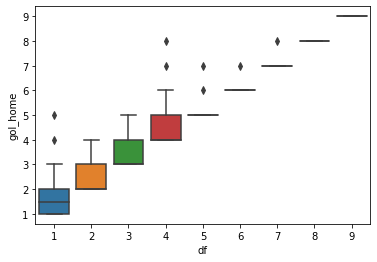

In [100]:
sns.boxplot(
    x='df',
    y='gol_home',
    data=mxloc[mxloc["gana"]==1]
)

Aqui tenemos un ejemplo para indagar más con la diferencia de goles los cuartiles y los goles anotados por México. En esta boxplot es observa los cuartiles correspondientes a cada diferencia de gol y en el eje y se muestra el número de goles anotados por México en ese partido ganado.

# USO DE GRÁFICAS 


# Margen de Victoria probabilidad
Usaremos las graficas de histograma y KDE para intentar visualizar las probabilidades del Margen de victoria, que es una de las variables favoritas de las personas para hacer apuestas

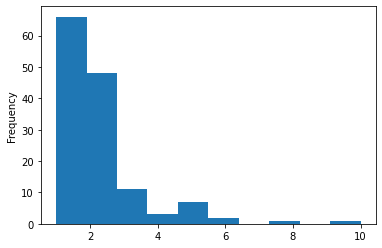

In [46]:
aganamxvst.plot.hist()

Histograma del margen de victoria de México como Visitante

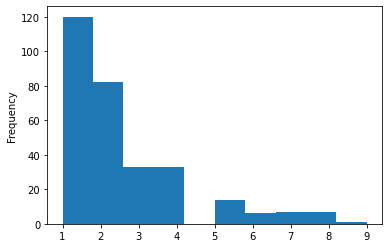

In [48]:
ganamxloc["df"].plot.hist()

Histograma del margen de victoria de México como local.

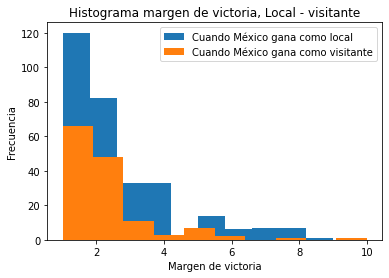

In [10]:
mxvst=mx[mx['visita']=='Mexico']
mxloc=mx[mx['local']=='Mexico']
ganamxloc=mxloc[mxloc["gana"]==1]
ganamxvst=mxvst[mxvst["gana"]==1]
aganamxvst=abs(ganamxvst["df"])
m = plt.hist(ganamxloc.df,label = "Cuando México gana como local")
b = plt.hist(aganamxvst,label = "Cuando México gana como visitante")
plt.legend()
plt.xlabel("Margen de victoria")
plt.ylabel("Frecuencia")
plt.title("Histograma margen de victoria, Local - visitante")
plt.show()

Aqui se puede observar los correspondientes histogramas del Margen de victoria de México cuando gana un partido de Local o visita. En estas gráficas obtenemos información importante ya que de primera vista podemos observar un parecido con la distribución exponencial o gamma. Aún así se deben hacer la pruebas correctas para determinar una distribución que se ajuste a los histogramas.

A continuación usaremos la Kernel Density Estimation Plot para intentar visualizar la función de densidad del Margen de Victoria tanto de local como de visita.

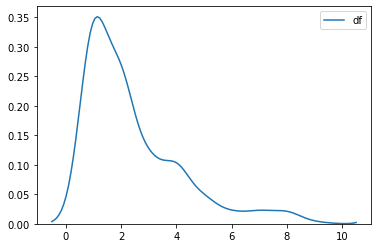

In [85]:
import seaborn as sns
sns.kdeplot(ganamxloc.df)

KDE para el margen de victoria cuando México gana como local, podemos observar una forma que  recuerda a la dsitribución gamma.

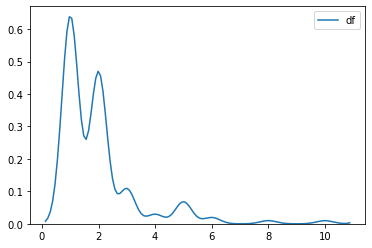

In [87]:
sns.kdeplot(aganamxvst)

KDE para el margen de victoria de México cuando gana como visitante. Aqui la dsitribución tiene una forma un poco más distinta ya que no recuerda tanto a gamma. Otra conclusión interesante es que pareciera haber probabilidades más altas que cuando México gane como visitante será por una diferencia de goles pequeña. Revelando de nuevo que México suele anotar menos goles como visita.

Obtener la distribución del Margen de victoria es una cuestión interesante de resolver ya que es una de las apuestas favoritas de los fanáticos, ya que se puede obtener grandes cantidades apostando poco. 

# Probabilidad empírica de ganar un partido
aqui mostramos como construir la serie de la evolución probabilidad empírica según el número de observaciones.

In [70]:
datf=mxloc['gana'].cumsum()
datf.index=datf.index+1
datf



1        1
2        2
3        2
4        3
5        4
      ... 
511    300
512    301
513    302
514    302
515    303
Name: gana, Length: 515, dtype: int64

In [71]:
probaemp=pd.DataFrame(datf)

probaemp

,gana
1,1
2,2
3,2
4,3
5,4
...,...
511,300
512,301
513,302
514,302


In [72]:
serie=probaemp['gana'] / probaemp.index

serie

1      1.000000
2      1.000000
3      0.666667
4      0.750000
5      0.800000
         ...   
511    0.587084
512    0.587891
513    0.588694
514    0.587549
515    0.588350
Length: 515, dtype: float64

Aqui se tiene la serie ya construida ahora se puede graficar

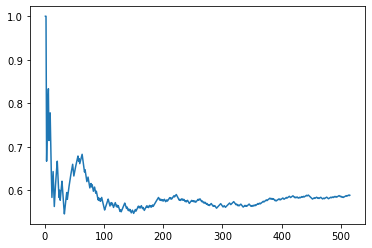

In [73]:
serie.plot.line()

Aqui se puede observar la evolución de la probabilidad empírica a lo largo que aumenta el número de observaciones. Se puede hacer zoom para ver mejor las ultimas 100 observaciones para el caro México jugando como local.

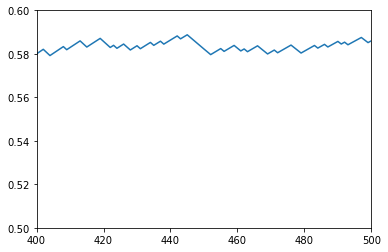

In [83]:
serie.plot.line(xlim=[400,500],ylim=[0.5,0.6])

Aqui tenemos una serie que representa la evolucíón  probabildad empírica de que México gane un partido como local

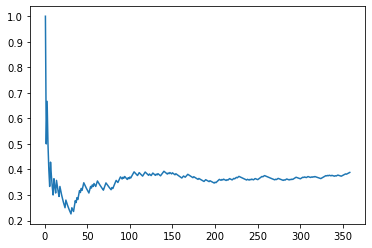

In [82]:
datfvst=mxvst['gana'].cumsum()
datfvst.index=datfvst.index-514

probaempvst=pd.DataFrame(datfvst)
serievst=probaempvst['gana'] / probaempvst.index

serievst.plot.line()

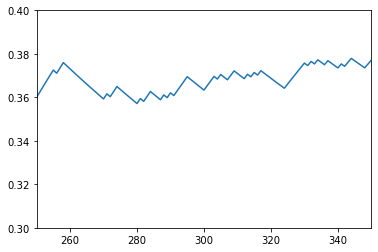

In [84]:
serievst.plot.line(xlim=[250,350],ylim=[0.3,0.4])

Aqui tenemos la evolución de la probabilidad empírica de que México gane un partido como visitante para las ultimas 100 observaciones.

# Conclusiones
Con a las gráficas pudimos obtener información muy útil para  las preguntas de interés. Con el histograma  y finalmente con el KDE pudimos visualizar la probabilidad del margen de victoria de México cuando gana un partido, se podría usar este método KDE para con los datos historícos que tenemos estimar la probabilidad del margen de goles en caso de victoria.  

También con la gráfica de lineas pudimos ver el estado reciente de la probabilidad empírica de ganar un partido, esto construido con las observaciónes historicas. Observamos que como local esta probabilidad está muy estable  entre 0.58 y 0.59. 
 Como visitante esta probabilidad se encuentra flucutuando 0.36 y 0.38 si bien puede ser un tanto estable, es evidente que además de ser menor al caso de local tambíén fluctua un poco más, pero por si misma también muestra estabilidad durante los tiempos recientes.